Nama : Eva Fiorina Siahaan

NIM : 1103210101

Tugas UAS Machine Learning

Reproduce Workflow and Create Video Tutorial of Image Classification​

Dataset (MNIST ANGKA)

Referensi : (https://www.tensorflow.org/datasets/catalog/mnist?hl=id)

https://m.youtube.com/watch?v=Rf5bSKrLsnk

**Import Library dan Install Tensorflow**

In [42]:
!pip install tensorflow

In [43]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

## **Memuat Dataset MNIST**

In [44]:
#Memuat Dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Melihat jumlah data
print("Data Train :", X_train.shape[0])
print("Data Test :", X_test.shape[0])


Data Train : 60000
Data Test : 10000


## **Menampilkan isi Dataset MNIST**

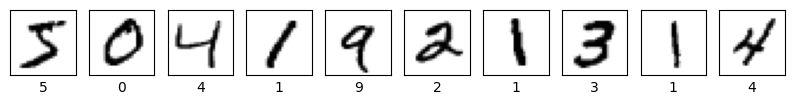

In [45]:
def plot_images(X, y, num_images=10):

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap=plt.cm.binary)
        plt.xlabel(y[i])
    plt.show()

# Menampilkan 10 gambar dari dataset
plot_images(X_train, y_train)

# **Preprocessing**

**Mengatur Ulang Dimensi Data**

Reshaping data bertujuan menambahkan dimensi tambahan yang merepresentasikan channel warna sehingga memastikan data kompatibel dengan arsitektur CNN. Dimana dimensi gambar adalah 28x28 piksel, 1 adalah jumlah channel warna, jika gambar berwarna (RGB), jumlah channel biasanya adalah 3.


In [46]:
# Reshape the data to include a single color channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

**Normalisasi Data**

astype('float32'): Mengubah tipe data dari elemen-elemen dalam array X_train dan X_test menjadi float32 (32-bit floating point). Nilai piksel asli dalam gambar grayscale berada dalam rentang 0 hingga 255. Dengan membaginya dengan 255.0, nilai piksel tersebut akan berada dalam rentang 0.0 hingga 1.0
Dengan mengubah tipe data menjadi float32 dan membagi dengan 255.0, kode ini menormalkan nilai piksel gambar ke dalam rentang 0 hingga 1. Ini adalah langkah penting untuk memastikan bahwa data siap digunakan dalam pelatihan model machine learning dengan stabilitas dan efisiensi yang lebih baik.

In [47]:
# Normalize the images to a range of 0 to 1
X_train = X_train.astype('float32') / 255.0  #mengubah tipe data dari elemen-elemen dalam array X_train dan X_test menjadi float32 (32-bit floating point)
X_test = X_test.astype('float32') / 255.0

**One-hot Encoding**

One-hot encoding adalah teknik representasi data yang sering digunakan untuk mengonversi label kategori menjadi format biner yang dapat digunakan oleh model machine learning. Kita menggunakan one-hot encoding untuk mengonversi label digit (0-9) dari dataset MNIST

In [48]:
# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)  #mengonversi label kelas menjadi representasi one-hot
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [58]:
# Display the first 5 labels before and after one-hot encoding
print("Original labels (first 5):", y_train[:5])
print("One-hot encoded labels (first 5):")
print(y_train[:5])

Original labels (first 5): [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
One-hot encoded labels (first 5):
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [49]:
# Display the shapes of the preprocessed data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


# **Model CNN**

In [50]:
# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # lapisan konvolusi dengan 32 kernel
    layers.MaxPooling2D((2, 2)),                                            # Mengambil maksimum dari setiap 2x2 blok, mengurangi dimensi data
    layers.Conv2D(64, (3, 3), activation='relu'),                           # lapisan konvolusi dengan 64 kernel
    layers.MaxPooling2D((2, 2)),                                            # Mengambil maksimum dari setiap 2x2 blok, mengurangi dimensi data
    layers.Conv2D(64, (3, 3), activation='relu'),                           # lapisan konvolusi dengan 64 kernel
    layers.Flatten(),                                                       # Mengubah output dari lapisan convolutional (yang berbentuk 3D)
                                                                            # menjadi bentuk vektor 1D. Ini diperlukan sebelum memasukkan data ke lapisan fully connected (dense).
    layers.Dense(64, activation='relu'),                                    # Jumlah Neuron dlm lapisan
    layers.Dense(10, activation='softmax')                                  # Jumlah neuron dalam lapisan ini, sesuai dengan jumlah kelas yang ada (10 digit, 0-9)
])

**Compile Model**

Adam (Adaptive Moment Estimation) adalah optimizer yang populer karena kemampuannya menggabungkan keuntungan dari optimizers AdaGrad dan RMSProp. Adam menyesuaikan laju pembelajaran secara adaptif untuk setiap parameter, yang biasanya menghasilkan konvergensi yang lebih cepat dan stabil

In [51]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Training Model**

In [52]:
# Train the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 87s 45ms/step - loss: 0.1455 - accuracy: 0.9541 - val_loss: 0.0489 - val_accuracy: 0.9846
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0322 - val_accuracy: 0.9892
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0288 - val_accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0318 - val_accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0502 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0391 -

**Evaluasi Model**

In [53]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 2s - loss: 0.0329 - accuracy: 0.9925 - 2s/epoch - 8ms/step
Test accuracy: 0.9925


**Visualisasi Akurasi dan Loss**

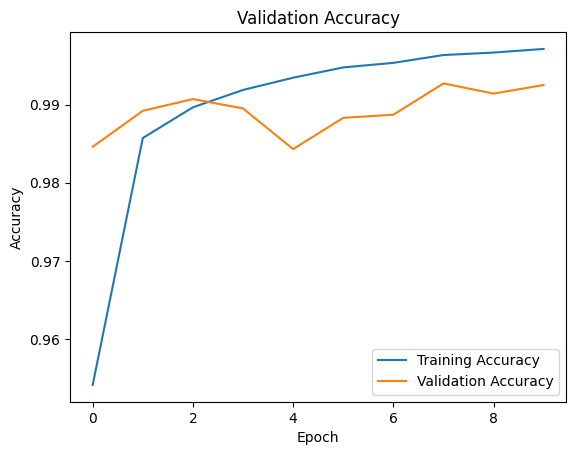

/n


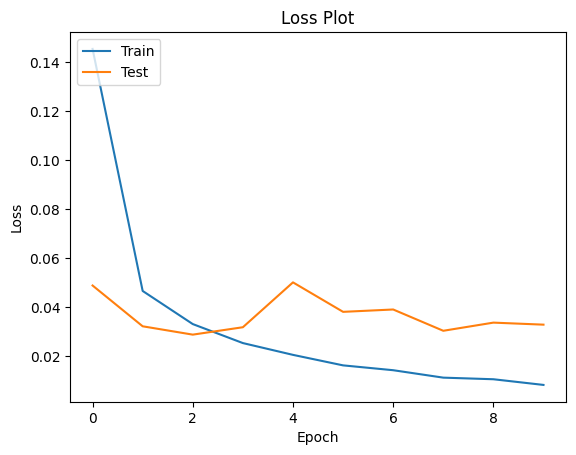

In [54]:
#Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')
plt.show()

print('/n')

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Confusion Matrix**

313/313 [==============================] - 3s 9ms/step


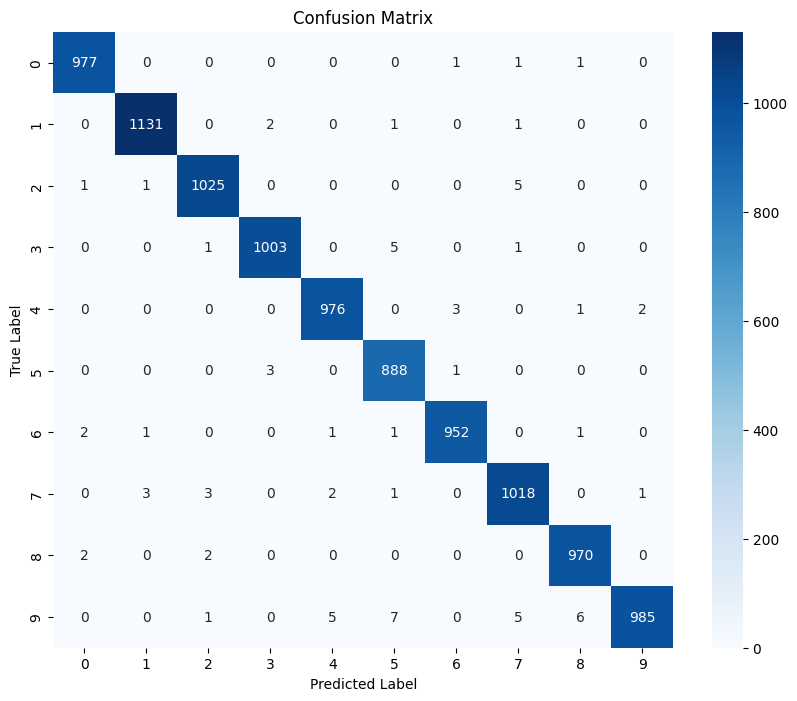

In [55]:
# Predict the labels of the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Menampilkan Prediksi**

313/313 [==============================] - 4s 14ms/step


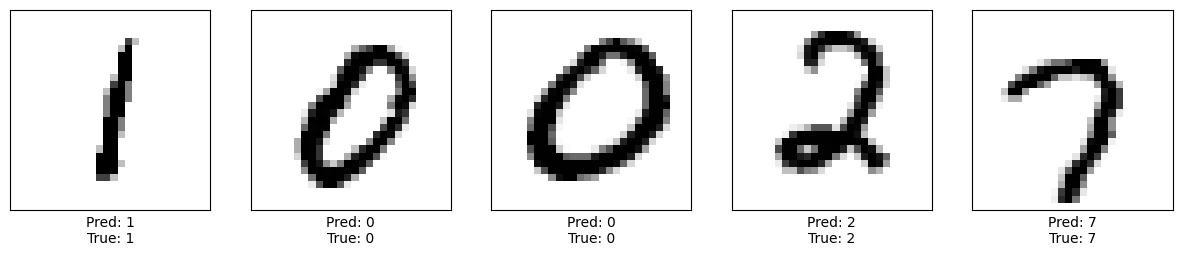

In [56]:
# Predict labels for the entire test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Select a few random images from the test set
num_images = 5
random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)
X_sample = X_test[random_indices]
y_sample_true = true_labels[random_indices]
y_sample_pred = predicted_labels[random_indices]

# Plot the sample images with their predicted and true labels
plt.figure(figsize=(15, 7))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_sample[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Pred: {y_sample_pred[i]}\nTrue: {y_sample_true[i]}')
plt.show()

**Menampilkan Beberapa Hasil Klasifikasi Yang Salah**

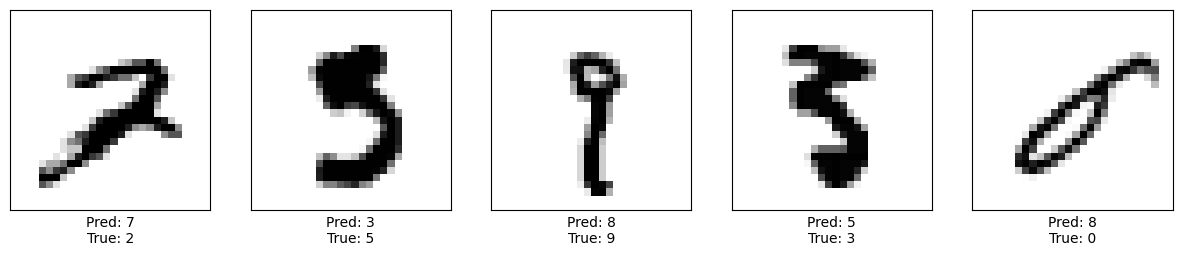

In [57]:
# Find indices where predictions do not match true labels
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# Select a few random misclassified images
num_images = 5
random_misclassified_indices = np.random.choice(misclassified_indices, num_images, replace=False)
X_sample = X_test[random_misclassified_indices]
y_sample_true = true_labels[random_misclassified_indices]
y_sample_pred = predicted_labels[random_misclassified_indices]

# Plot the misclassified sample images with their predicted and true labels
plt.figure(figsize=(15, 7))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_sample[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'Pred: {y_sample_pred[i]}\nTrue: {y_sample_true[i]}')
plt.show()